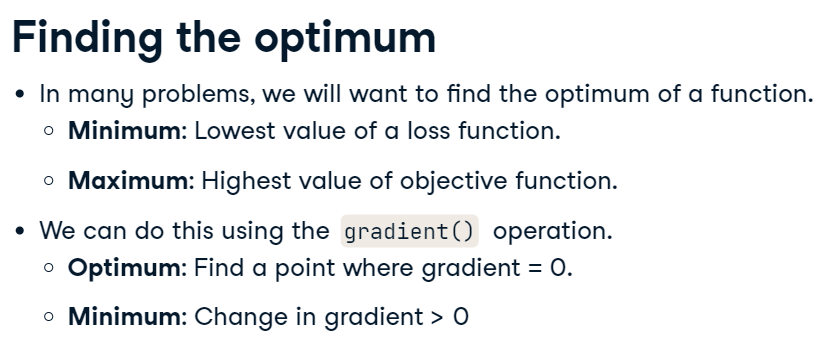

In [1]:
import tensorflow as tf

In [7]:
# define x
x = tf.Variable(-1.0)

# define y within instance of GradientTape
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x,x)
    
    
# evaluate the gradient of y at x = -1
g = tape.gradient(y,x)
print(g)

tf.Tensor(-2.0, shape=(), dtype=float32)


# Reshaping a grayscale image

In [8]:
# generate grayscale image
gray = tf.random.uniform([2,2],maxval = 255, dtype = 'int32')

# reshape the image
gray = tf.reshape(gray, [2*2,1])
                         

# Reshaping a color image

In [12]:
# generate grayscale image
color = tf.random.uniform([2,2,3],maxval = 255, dtype = 'int32')

# reshape the image
color= tf.reshape(color, [2*2,3])
                         

In [14]:
import pandas as pd

gray_tensor = pd.read_csv('./data/gray_tensor.csv').to_numpy()

color_tensor = pd.read_csv('./data/color_tensor.csv').to_numpy().reshape(28, 28, 3)

Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3

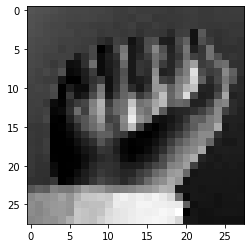

In [15]:
import matplotlib.pyplot as plt

plt.imshow(gray_tensor, cmap=plt.cm.binary)
# plt.imshow(image, interpolation='nearest')

In [16]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

### Optimizing with gradients
You are given a loss function, y=x^2, which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.gradient

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0.

In [17]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = x * x
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


Notice that the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0


### Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, letter. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, model, which can be used to classify letter.

The 3x3 tensor, letter, and the 1x3 tensor, model, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, model is a collection of weights, arranged in a tensor.

Note that the functions reshape(), matmul(), and reduce_sum() have been imported from tensorflow and are available for use

In [19]:
import numpy as np
letter = np.array([[1.0, 0, 1.0], [1., 1., 0], [1., 0, 1.] ])
model = np.array([[1., 0., -1.]])

In [20]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


Your model found that prediction=1.0 and correctly classified the letter as a K. In the coming chapters, you will use data to train a model, model, and then combine this with matrix multiplication, matmul(letter, model), as we have done here, to make predictions about the classes of objects